In [1]:
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [21]:
# Load in results

import pickle
model = 'Mistral'

k=4
results_dicts_4 = dict()
for dataset_name in ['agnews', 'financial_phrasebank', 'glue_sst2', 'rotten_tomatoes', 'sst5', 'subjective', 'trec', 'tweet_eval_emotion', 'tweet_eval_hate']:
    try:
        file_path = f"../results/{model}/results_k_[{k}]_seeds_5_datasets_['{dataset_name}']_models_['{model}']_.pkl"
        with open(file_path,'rb') as f:
            results_dicts_4[dataset_name] = pickle.load(f)
    except Exception as e:
        print(e)
        print(f'Cannot find {dataset_name}')

k=8
results_dicts_8 = dict()
for dataset_name in ['agnews', 'financial_phrasebank', 'glue_sst2', 'rotten_tomatoes', 'sst5', 'subjective', 'trec', 'tweet_eval_emotion', 'tweet_eval_hate']:
    try:
        file_path = f"../results/{model}/results_k_[{k}]_seeds_5_datasets_['{dataset_name}']_models_['{model}']_.pkl"
        with open(file_path,'rb') as f:
            results_dicts_8[dataset_name] = pickle.load(f)
    except Exception as e:
        print(e)
        print(f'Cannot find {dataset_name}')



[Errno 2] No such file or directory: "../results/Mistral/results_k_[4]_seeds_5_datasets_['sst5']_models_['Mistral']_.pkl"
Cannot find sst5
[Errno 2] No such file or directory: "../results/Mistral/results_k_[4]_seeds_5_datasets_['trec']_models_['Mistral']_.pkl"
Cannot find trec
[Errno 2] No such file or directory: "../results/Mistral/results_k_[8]_seeds_5_datasets_['sst5']_models_['Mistral']_.pkl"
Cannot find sst5
[Errno 2] No such file or directory: "../results/Mistral/results_k_[8]_seeds_5_datasets_['trec']_models_['Mistral']_.pkl"
Cannot find trec
[Errno 2] No such file or directory: "../results/Mistral/results_k_[8]_seeds_5_datasets_['tweet_eval_emotion']_models_['Mistral']_.pkl"
Cannot find tweet_eval_emotion


In [40]:
def generate_plot(results_dicts_list, dataset_name, methods_to_compare, metrics):
    
    k,n = len(results_dicts_list), len(metrics)
    fig, axes = plt.subplots(nrows=n, ncols=k, figsize=(10*k, 5*n))

    for j, results_dicts in enumerate(results_dicts_list):
        
        methods_perms = dict()
        for method in methods_to_compare[j]:
            methods_perms[method] = []
    
        outcomes = results_dicts[dataset_name][model]['results_dic']
        outcomes = outcomes[list(outcomes.keys())[0]]

        for seed in outcomes:
            outcome = outcomes[seed][list(outcomes[seed].keys())[0]]
            for m in outcome:
                if m in methods_to_compare[j]:
                    methods_perms[m].append(outcome[m])
    
        
        for i, metric in enumerate(metrics):
        
            values_to_plot = []
            for method in methods_to_compare[j]:
                values_to_plot.append(np.mean(np.array([d[metric] for d in methods_perms[method]])))
            axes[i,j].scatter([name if 'LR' not in name else name[:4] for name in methods_to_compare[j] ], values_to_plot)
            axes[i,j].set_title(metric)

In [35]:
methods_to_compare_4 = ['Baseline', 'CC', 'Domain', 'Batch', 'LR-average_voting',\
                      'LR-0','LR-1-average_voting','LR-2-average_voting','LR-3-average_voting']
methods_to_compare_8 = ['Baseline', 'CC', 'Domain', 'Batch', 'LR-average_voting',\
                      'LR-0','LR-1-average_voting','LR-2-average_voting','LR-3-average_voting','LR-4-average_voting','LR-5-average_voting']
metrics = ['accuracy','averaged_truelabel_likelihood','macro_F1','expected_calibration_error_1']

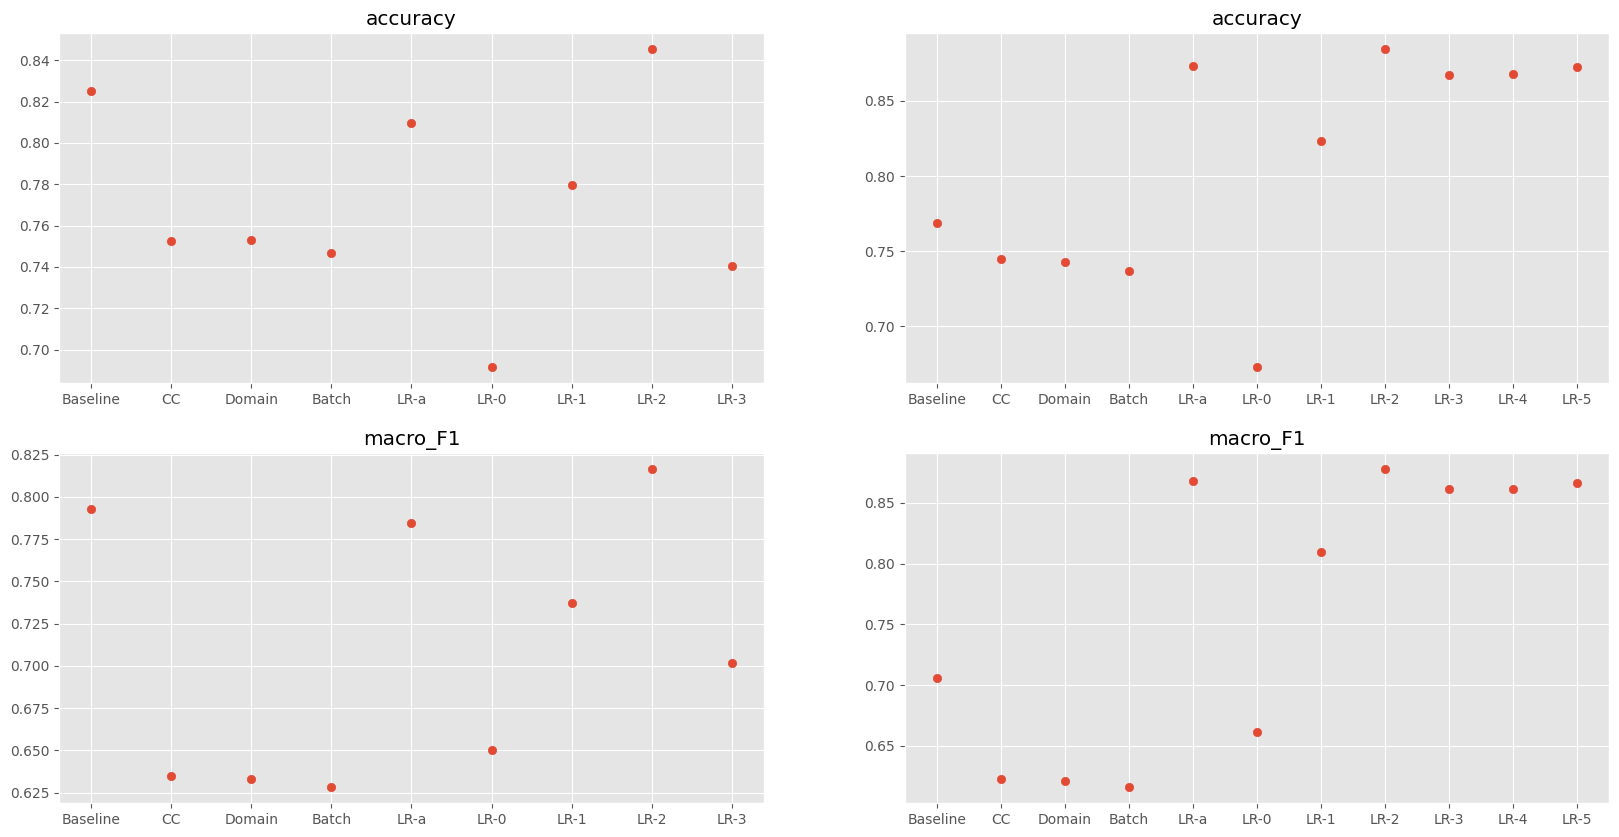

In [41]:
generate_plot([results_dicts_4, results_dicts_8], 'agnews', [methods_to_compare_4, methods_to_compare_8], ['accuracy','macro_F1'])

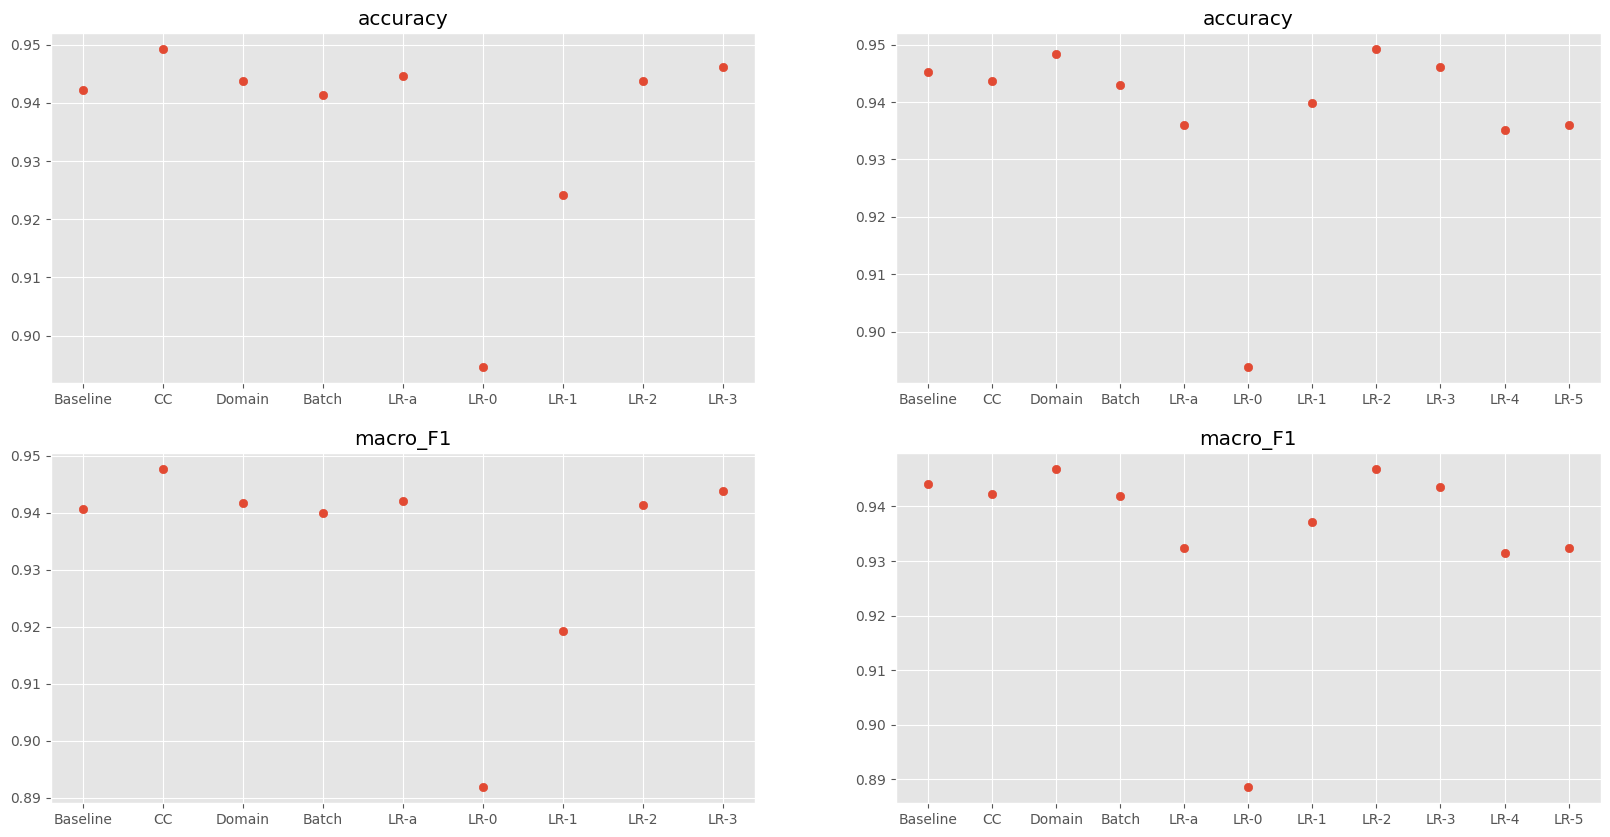

In [42]:
generate_plot([results_dicts_4, results_dicts_8], 'glue_sst2', [methods_to_compare_4, methods_to_compare_8], ['accuracy','macro_F1'])

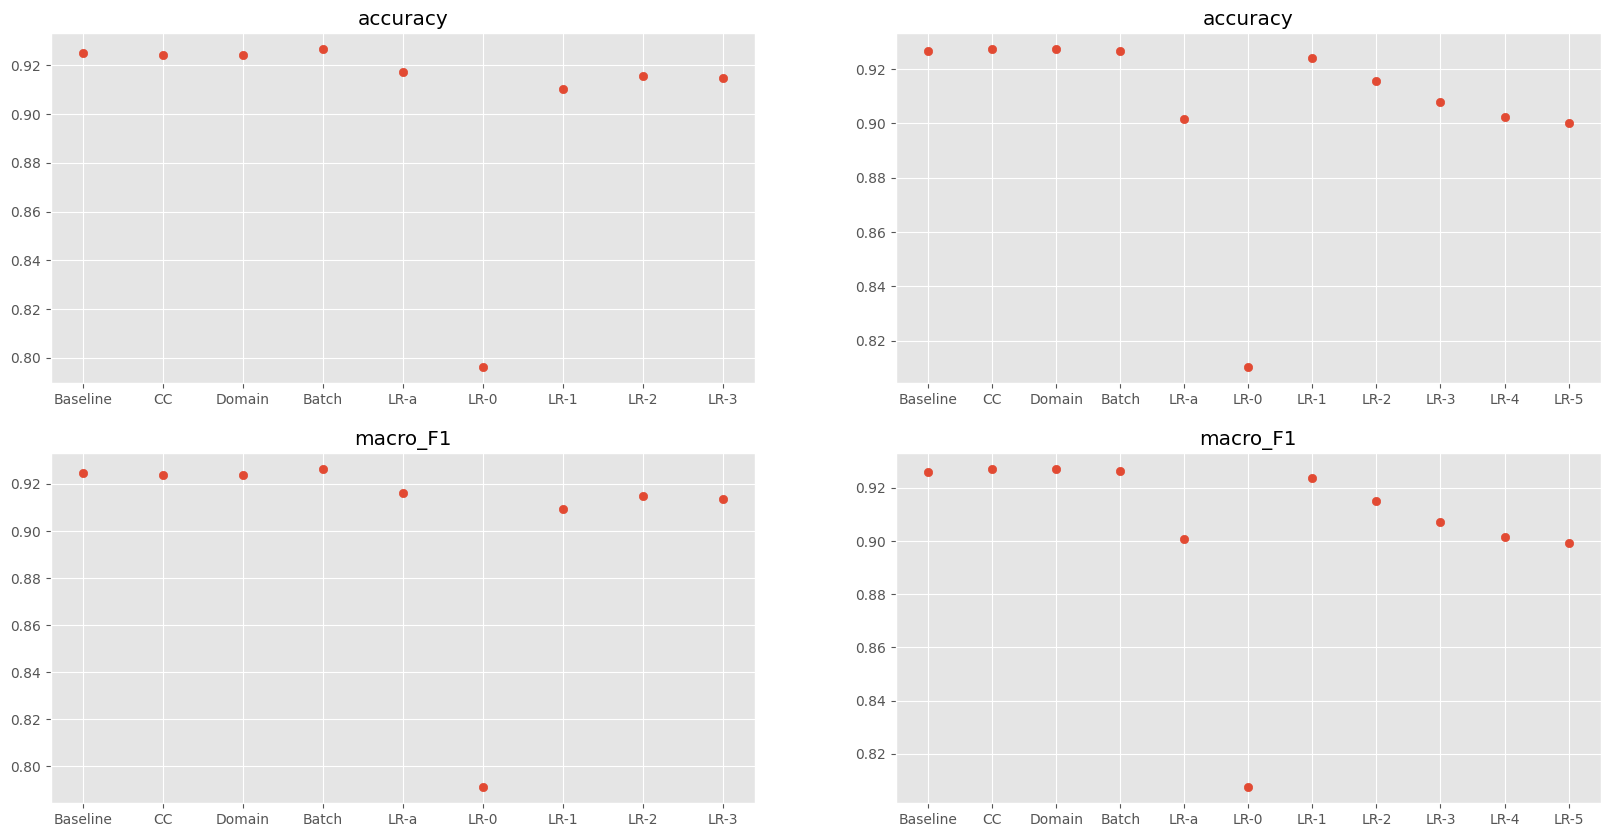

In [45]:
generate_plot([results_dicts_4, results_dicts_8], 'rotten_tomatoes', [methods_to_compare_4, methods_to_compare_8], ['accuracy','macro_F1'])

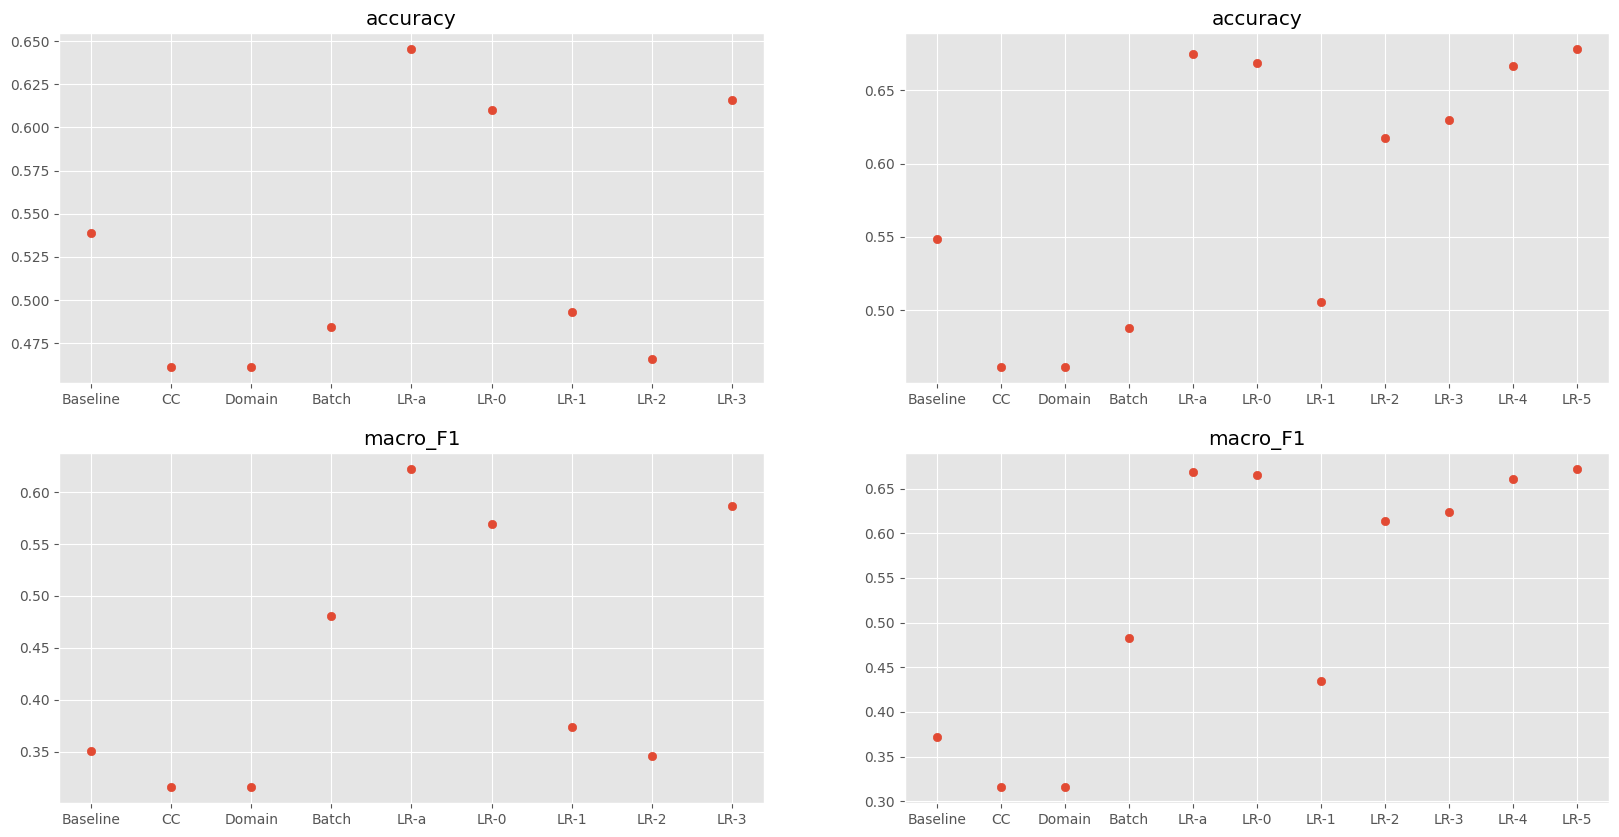

In [46]:
generate_plot([results_dicts_4, results_dicts_8], 'subjective', [methods_to_compare_4, methods_to_compare_8], ['accuracy','macro_F1'])

KeyError: 'tweet_eval_emotion'

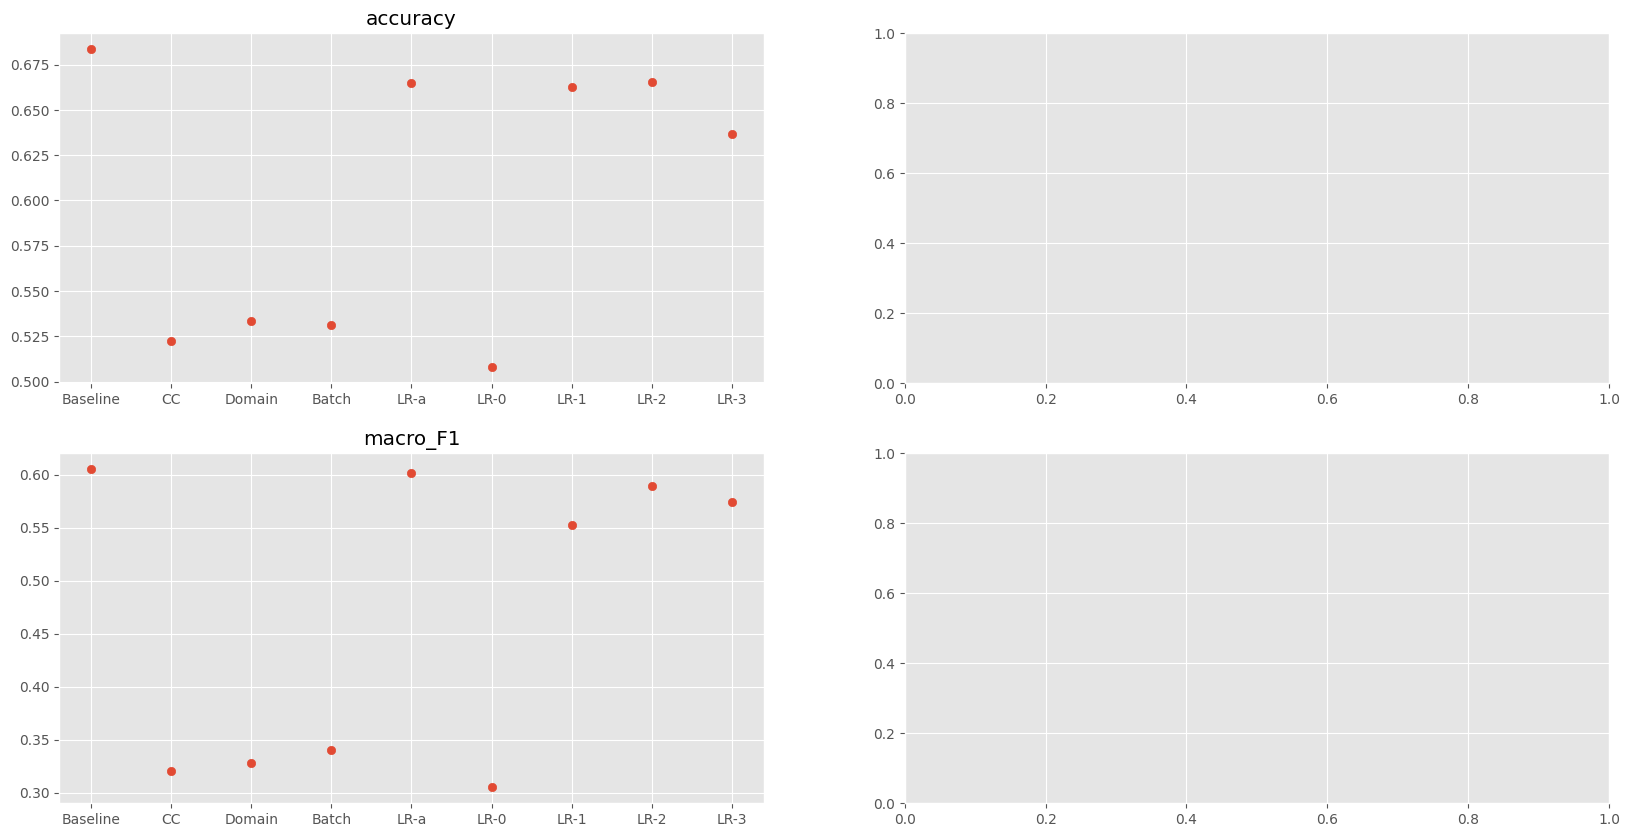

In [47]:
generate_plot([results_dicts_4, results_dicts_8], 'tweet_eval_emotion', [methods_to_compare_4, methods_to_compare_8], ['accuracy','macro_F1'])

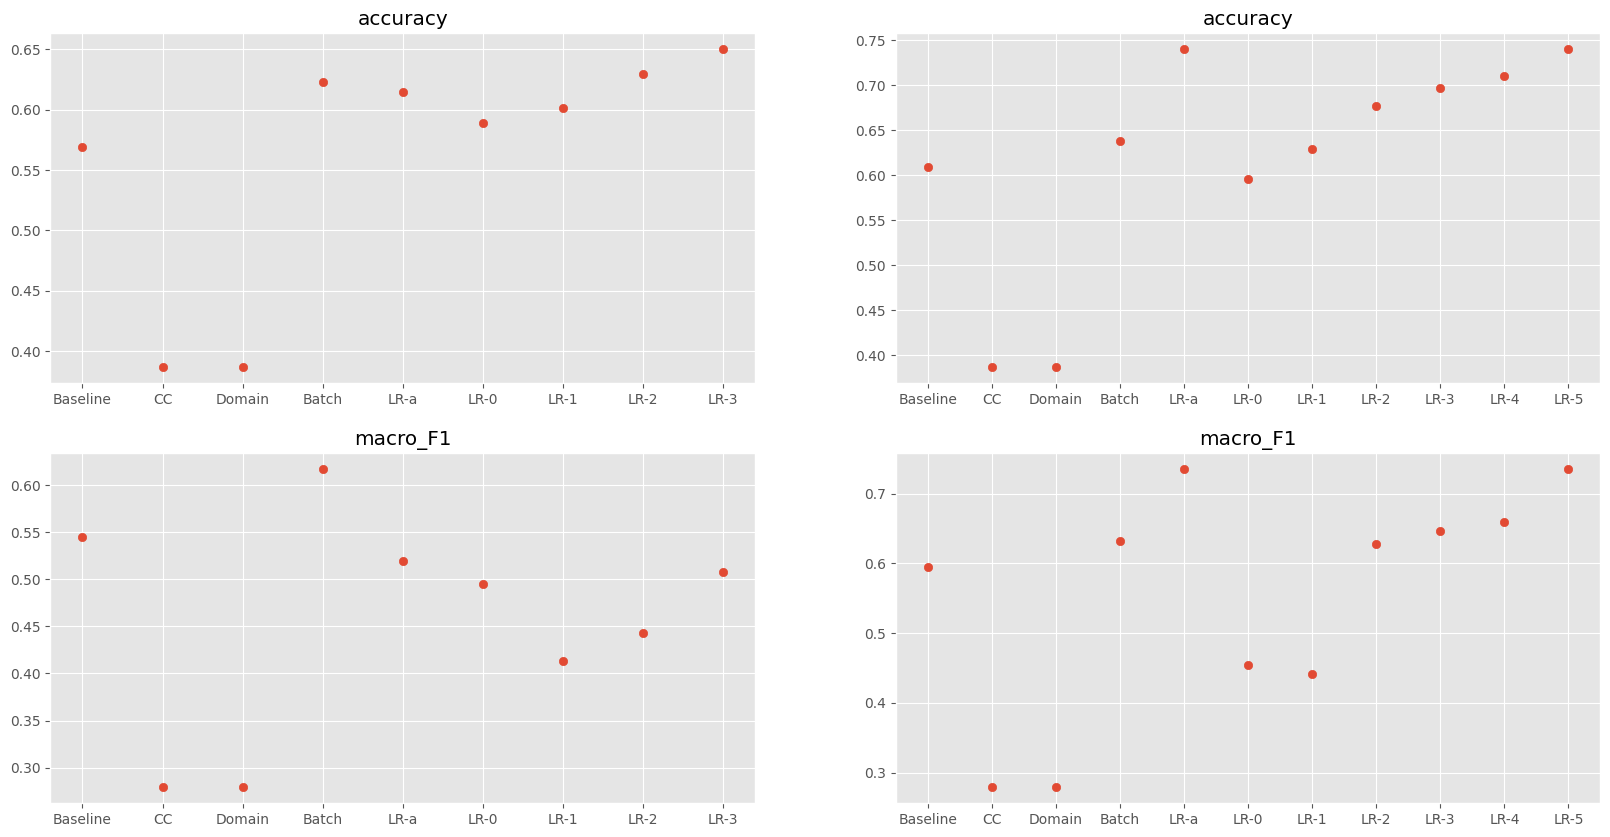

In [48]:
generate_plot([results_dicts_4, results_dicts_8], 'tweet_eval_hate', [methods_to_compare_4, methods_to_compare_8], ['accuracy','macro_F1'])

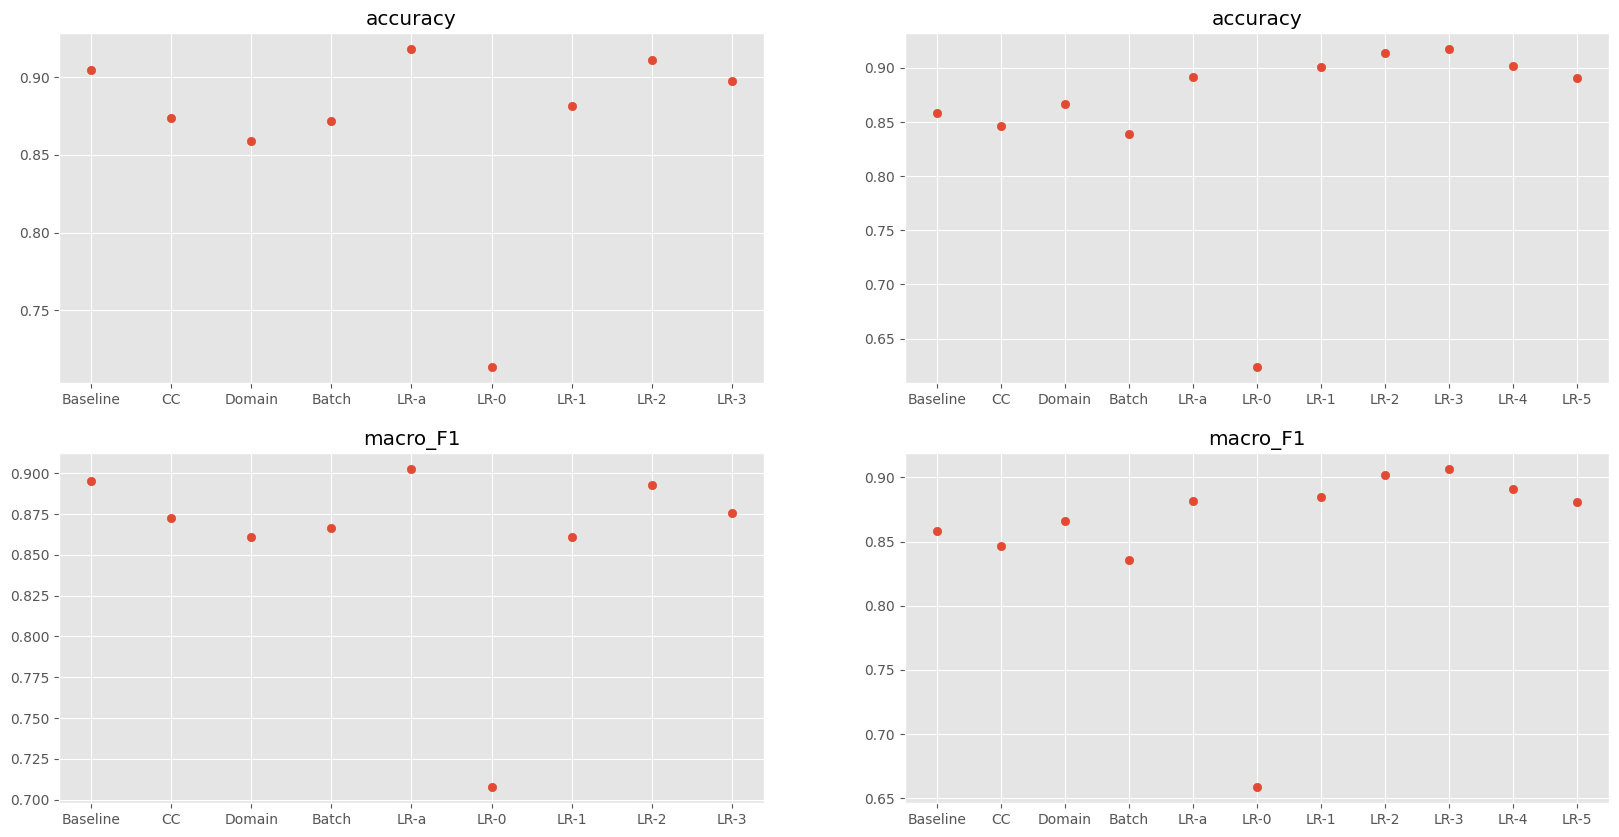

In [49]:
generate_plot([results_dicts_4, results_dicts_8], 'financial_phrasebank', [methods_to_compare_4, methods_to_compare_8], ['accuracy','macro_F1'])